<a href="https://colab.research.google.com/github/primriq/ML-Apex-Univ/blob/main/svm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2 style='color:blue' align='center'>Support Vector Machine (SVM) Classification — Complete Storyline</h2>

Support Vector Machines (SVMs) are among the most powerful supervised learning algorithms.

In this notebook, we walk step‑by‑step through how SVM works in practice using the **Iris dataset**, a built‑in dataset in scikit‑learn. This notebook follows a clear storyline so students can learn smoothly without jumping between concepts.

### What we’ll do:
1. Load and explore the Iris dataset
2. Build a DataFrame and understand the features
3. Visualize class distributions
4. Train a baseline SVM model
5. Evaluate the model using accuracy and detailed metrics
6. Visualize the confusion matrix
7. Experiment with SVM hyperparameters — **C**, **gamma**, and **kernel**
8. Interpret how these parameters shape the decision boundary


In [23]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
import seaborn as sn

# Load Iris dataset
iris = load_iris()

### Understanding the Iris Dataset
The Iris dataset includes **150 flower samples**, each belonging to one of three species:
- **Setosa**
- **Versicolor**
- **Virginica**

For each sample we have 4 measurements:
- Sepal length
- Sepal width
- Petal length
- Petal width

In [24]:
print('Feature names:', iris.feature_names)
print('Target names:', iris.target_names)
print('Data shape:', iris.data.shape)

Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names: ['setosa' 'versicolor' 'virginica']
Data shape: (150, 4)


### Converting to a DataFrame
To make exploration easier, we convert the dataset into a pandas DataFrame.

In [25]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
df['species'] = df['target'].apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


### Visualizing Patterns in the Data
A simple scatter plot of **petal length vs petal width** shows how well classes separate.

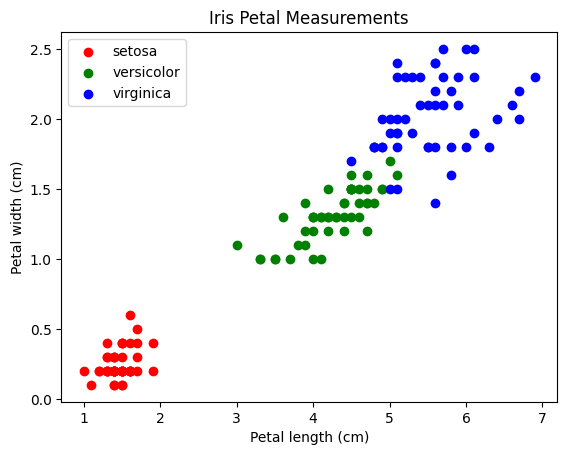

In [26]:
colors = ['red', 'green', 'blue']
for target_value, color in zip([0,1,2], colors):
    subset = df[df.target == target_value]
    plt.scatter(subset['petal length (cm)'], subset['petal width (cm)'],
                color=color, label=iris.target_names[target_value])
plt.xlabel('Petal length (cm)')
plt.ylabel('Petal width (cm)')
plt.legend()
plt.title('Iris Petal Measurements')
plt.show()

###  Splitting Data Into Train and Test Sets
We use only **petal length** and **petal width** to keep our visual understanding simple.

In [27]:
X = df[['petal length (cm)', 'petal width (cm)']]
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
X_train.shape, X_test.shape

((120, 2), (30, 2))

###  Training a Baseline SVM Model
We start with the default SVM configuration which uses the **RBF kernel**.

In [28]:
model = SVC()
model.fit(X_train, y_train)
baseline_acc = model.score(X_test, y_test)
print('Baseline Test Accuracy:', baseline_acc)

Baseline Test Accuracy: 1.0


### Model Evaluation — Accuracy, Precision, Recall, F1
Let's generate predictions and compute detailed evaluation metrics.

In [29]:
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', cm)

print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision (macro):', precision_score(y_test, y_pred, average='macro'))
print('Recall (macro):', recall_score(y_test, y_pred, average='macro'))
print('F1-score (macro):', f1_score(y_test, y_pred, average='macro'))

print('\nClassification Report:\n', classification_report(y_test, y_pred))

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Accuracy: 1.0
Precision (macro): 1.0
Recall (macro): 1.0
F1-score (macro): 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



###  Confusion Matrix Heatmap

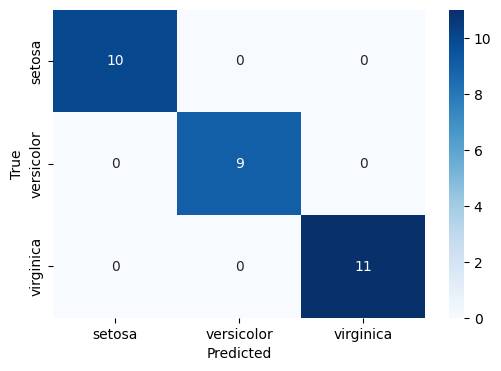

In [30]:
plt.figure(figsize=(6,4))
sn.heatmap(cm, annot=True, fmt='d', cmap='Blues',
           xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

###  Experimenting With the **C** Parameter
**C** controls how much penalty is applied to misclassification.

- Low C → softer margin, more regularization
- High C → harder margin, fits training data more closely

In [31]:
for C_value in [0.1, 1, 10]:
    model_C = SVC(C=C_value)
    model_C.fit(X_train, y_train)
    print(f'C={C_value}, Accuracy={model_C.score(X_test, y_test)}')

C=0.1, Accuracy=0.9666666666666667
C=1, Accuracy=1.0
C=10, Accuracy=1.0


###  Experimenting With **Gamma**
**Gamma** defines how far the influence of a training sample reaches.



In [32]:
for g in [0.1, 1, 10]:
    model_g = SVC(gamma=g)
    model_g.fit(X_train, y_train)
    print(f'gamma={g}, Accuracy={model_g.score(X_test, y_test)}')

gamma=0.1, Accuracy=1.0
gamma=1, Accuracy=1.0
gamma=10, Accuracy=1.0


###  Trying Different Kernels — Linear, RBF, Poly

In [33]:
for kernel in ['linear', 'rbf', 'poly']:
    model_k = SVC(kernel=kernel)
    model_k.fit(X_train, y_train)
    print(f'Kernel={kernel}, Accuracy={model_k.score(X_test, y_test)}')

Kernel=linear, Accuracy=1.0
Kernel=rbf, Accuracy=1.0
Kernel=poly, Accuracy=1.0


### 🏁 Summary
We built a full SVM classification pipeline using the Iris dataset.

**You learned:**
- How to load and explore the Iris dataset
- Visualize feature relationships
- Train SVM models with default settings
- Evaluate the model using detailed metrics
- Tune hyperparameters such as C, gamma, and kernel

